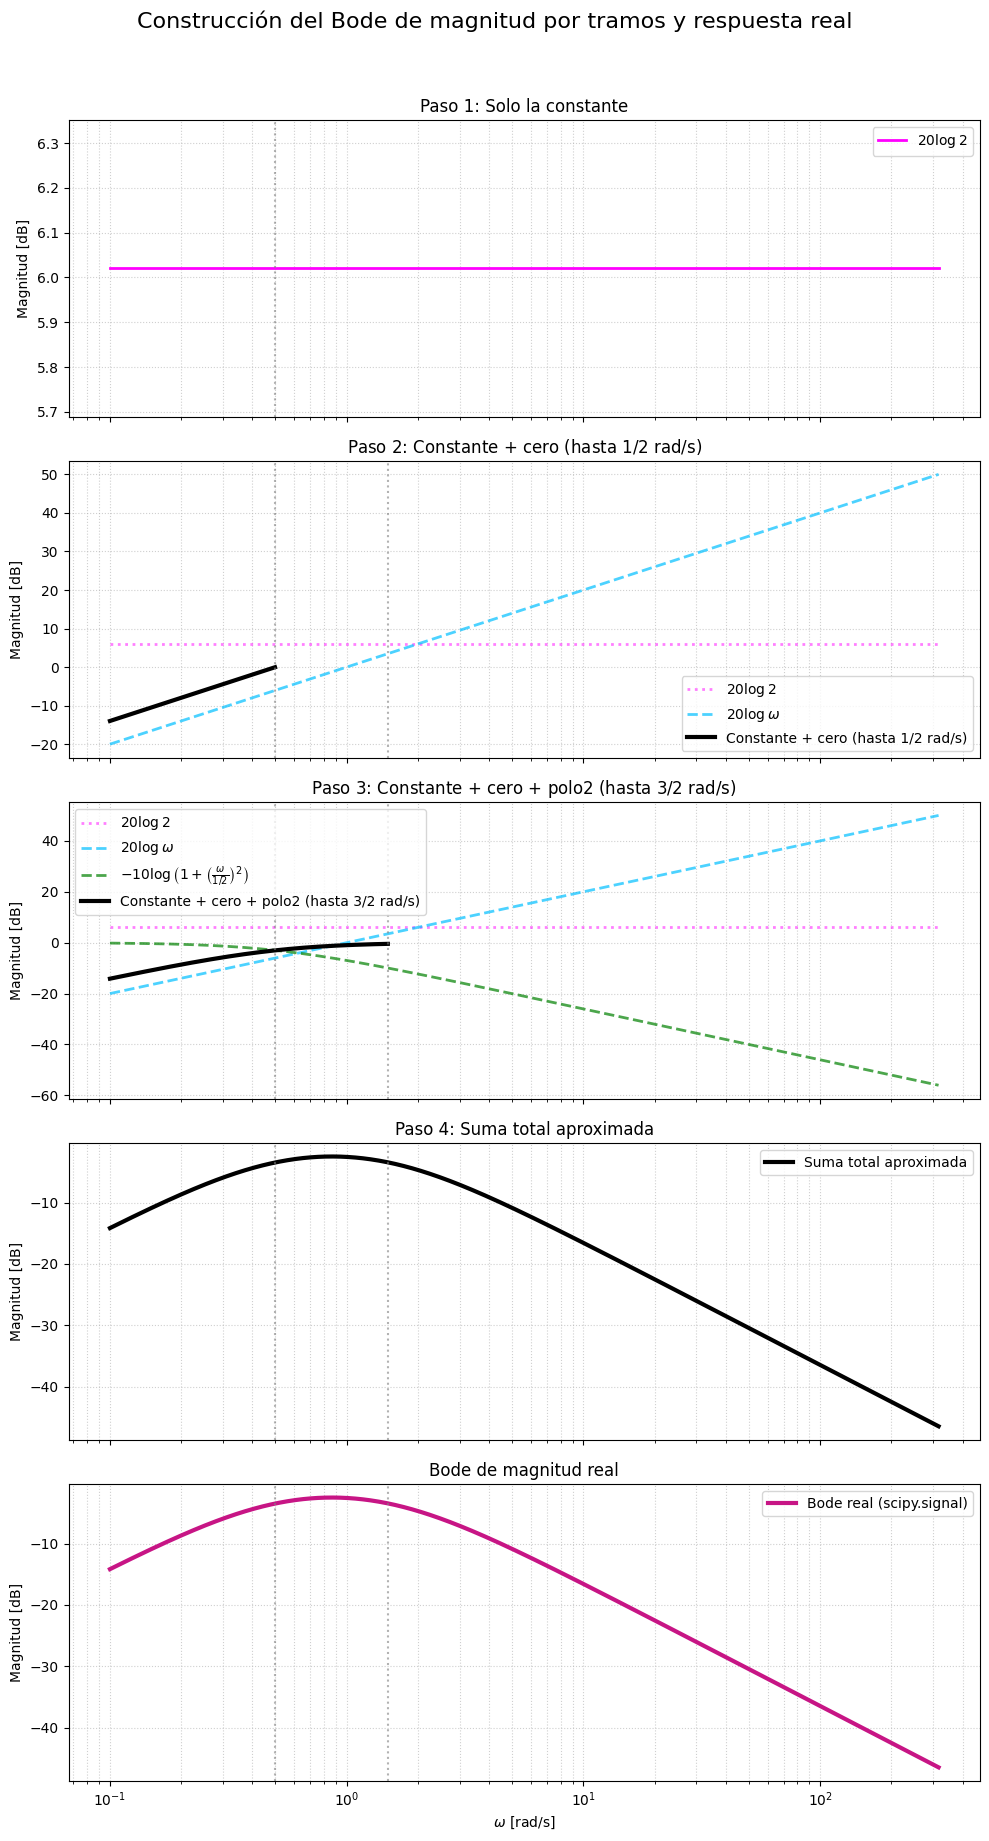

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Frecuencia angular (rad/s)
w = np.logspace(-1, 2.5, 1000)  # desde 0.1 hasta aprox 316 rad/s

# Constante (20 log 2)
constante = 20 * np.log10(2) * np.ones_like(w)

# Cero en origen (20 log w)
cero = 20 * np.log10(w)

# Polos en 3/2 y 1/2 rad/s
w_polo1 = 3/2
w_polo2 = 1/2

polo1 = -10 * np.log10(1 + (w / w_polo1)**2)
polo2 = -10 * np.log10(1 + (w / w_polo2)**2)

# Sumas parciales
paso1 = constante

paso2 = constante + cero
paso2[w > w_polo2] = np.nan  # cortar en polo2

paso3 = constante + cero + polo2
paso3[w > w_polo1] = np.nan  # cortar en polo1

paso4 = constante + cero + polo2 + polo1  # suma completa

# Transferencia real
num = [1.5, 0]       # 3/2 * s
den = [1, 2, 0.75]   # (s+3/2)(s+1/2) = s^2 + 2s + 3/4
system = signal.TransferFunction(num, den)
w_real, mag_real, phase_real = signal.bode(system, w)

# Graficar
fig, axs = plt.subplots(5, 1, figsize=(10, 18), sharex=True)
plt.subplots_adjust(hspace=0.3)

# Paso 1: Constante
axs[0].plot(w, paso1, color='magenta', linewidth=2, label=r'$20 \log 2$')
axs[0].set_xscale('log')
axs[0].set_ylabel('Magnitud [dB]')
axs[0].set_title('Paso 1: Solo la constante')
axs[0].grid(which='both', linestyle=':', alpha=0.6)
axs[0].legend()
axs[0].axvline(w_polo2, color='gray', linestyle=':', alpha=0.6)

# Paso 2: Constante + cero (hasta w_polo2)
axs[1].plot(w, paso1, color='magenta', linestyle=':', linewidth=2, alpha=0.5, label=r'$20 \log 2$')
axs[1].plot(w, cero, color='deepskyblue', linestyle='--', linewidth=2, alpha=0.7, label=r'$20 \log \omega$')
axs[1].plot(w, paso2, color='black', linewidth=3, label='Constante + cero (hasta 1/2 rad/s)')
axs[1].set_xscale('log')
axs[1].set_ylabel('Magnitud [dB]')
axs[1].set_title('Paso 2: Constante + cero (hasta $1/2$ rad/s)')
axs[1].grid(which='both', linestyle=':', alpha=0.6)
axs[1].legend()
axs[1].axvline(w_polo2, color='gray', linestyle=':', alpha=0.6)
axs[1].axvline(w_polo1, color='gray', linestyle=':', alpha=0.6)

# Paso 3: Constante + cero + polo2 (hasta w_polo1)
axs[2].plot(w, paso1, color='magenta', linestyle=':', linewidth=2, alpha=0.5, label=r'$20 \log 2$')
axs[2].plot(w, cero, color='deepskyblue', linestyle='--', linewidth=2, alpha=0.7, label=r'$20 \log \omega$')
axs[2].plot(w, polo2, color='green', linestyle='--', linewidth=2, alpha=0.7, label=r'$-10 \log\left(1 + \left(\frac{\omega}{1/2}\right)^2\right)$')
axs[2].plot(w, paso3, color='black', linewidth=3, label='Constante + cero + polo2 (hasta 3/2 rad/s)')
axs[2].set_xscale('log')
axs[2].set_ylabel('Magnitud [dB]')
axs[2].set_title('Paso 3: Constante + cero + polo2 (hasta $3/2$ rad/s)')
axs[2].grid(which='both', linestyle=':', alpha=0.6)
axs[2].legend()
axs[2].axvline(w_polo2, color='gray', linestyle=':', alpha=0.6)
axs[2].axvline(w_polo1, color='gray', linestyle=':', alpha=0.6)

# Paso 4: Suma total
axs[3].plot(w, paso4, color='black', linewidth=3, label='Suma total aproximada')
axs[3].set_xscale('log')
axs[3].set_ylabel('Magnitud [dB]')
axs[3].set_title('Paso 4: Suma total aproximada')
axs[3].grid(which='both', linestyle=':', alpha=0.6)
axs[3].legend()
axs[3].axvline(w_polo2, color='gray', linestyle=':', alpha=0.6)
axs[3].axvline(w_polo1, color='gray', linestyle=':', alpha=0.6)

# Paso 5: Respuesta real
axs[4].plot(w_real, mag_real, color='mediumvioletred', linewidth=3, label='Bode real (scipy.signal)')
axs[4].set_xscale('log')
axs[4].set_xlabel(r'$\omega$ [rad/s]')
axs[4].set_ylabel('Magnitud [dB]')
axs[4].set_title('Bode de magnitud real')
axs[4].grid(which='both', linestyle=':', alpha=0.6)
axs[4].legend()
axs[4].axvline(w_polo2, color='gray', linestyle=':', alpha=0.6)
axs[4].axvline(w_polo1, color='gray', linestyle=':', alpha=0.6)

plt.suptitle('Construcción del Bode de magnitud por tramos y respuesta real', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


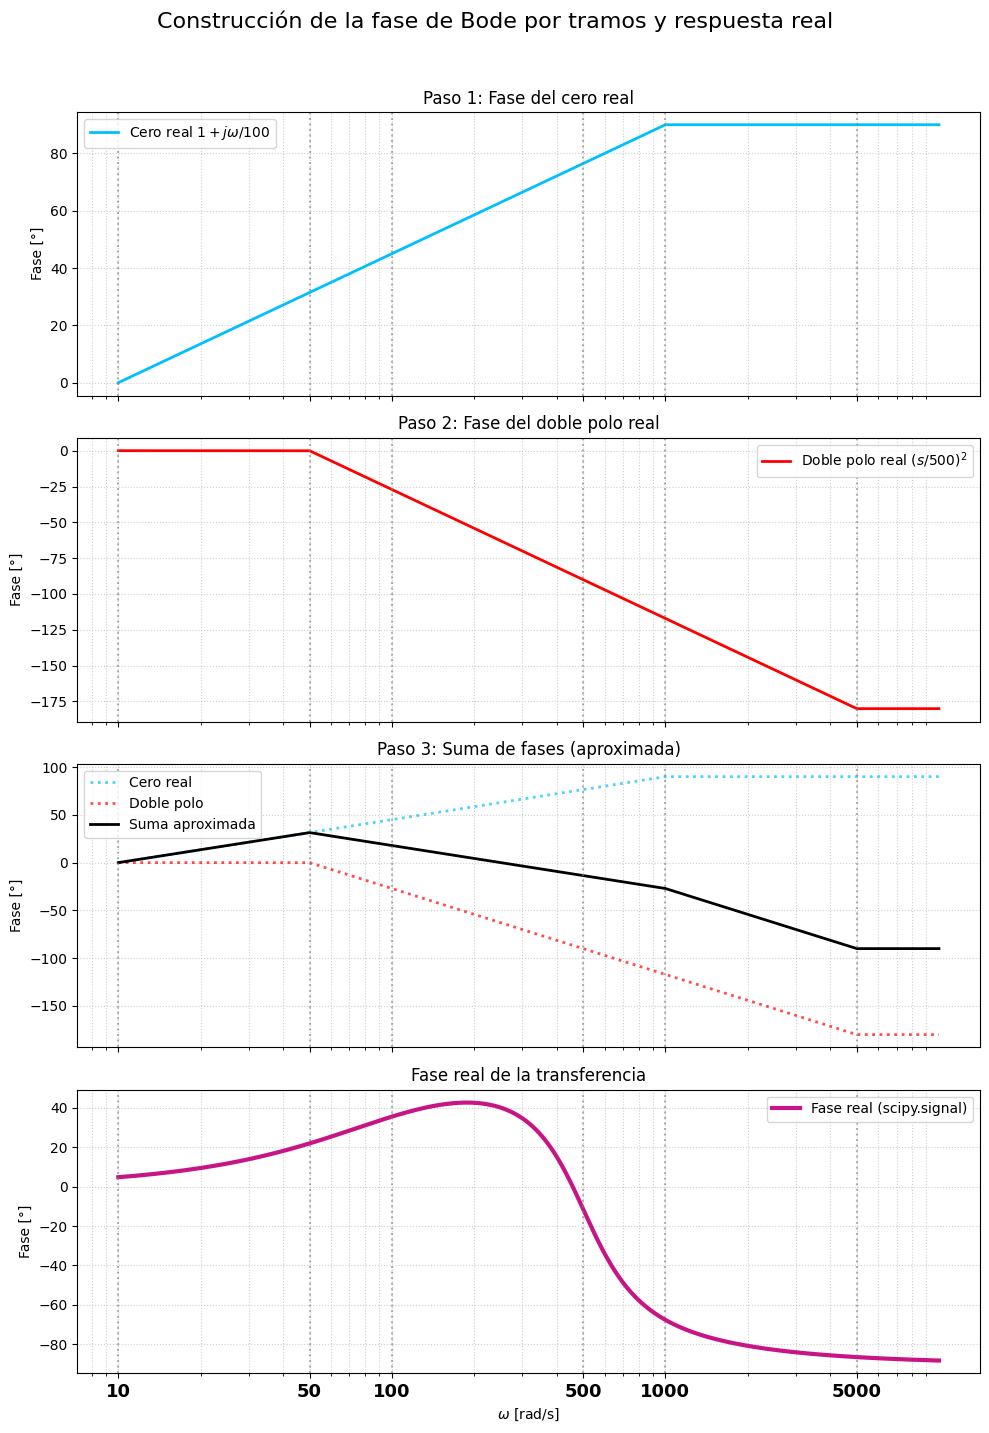

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

w = np.logspace(1, 4, 1000)  # 10 a 10000 rad/s

# --- 1. Fase del cero real en 100 rad/s ---
fase_cero = np.zeros_like(w)
for i, wi in enumerate(w):
    if wi < 10:
        fase_cero[i] = 0
    elif 10 <= wi < 100:
        fase_cero[i] = 45 * np.log10(wi / 10)
    elif 100 <= wi < 1000:
        fase_cero[i] = 45 + 45 * np.log10(wi / 100)
    else:
        fase_cero[i] = 90

# --- 2. Fase del doble polo real en 500 rad/s ---
fase_polo = np.zeros_like(w)
for i, wi in enumerate(w):
    if wi < 50:
        fase_polo[i] = 0
    elif 50 <= wi < 500:
        fase_polo[i] = -90 * np.log10(wi / 50)
    elif 500 <= wi < 5000:
        fase_polo[i] = -90 - 90 * np.log10(wi / 500)
    else:
        fase_polo[i] = -180

# Suma de aportes (cero + doble polo)
fase_aprox = fase_cero + fase_polo

# --- 3. Fase real (scipy) para comparar ---
num = [5000, 500000]
den = [1, 400, 250000]
system = signal.TransferFunction(num, den)
_, _, phase_real = signal.bode(system, w=w)

# Frecuencias importantes para marcar como ticks
marcas = [10, 50, 100, 500, 1000, 5000]
marcas_labels = [str(m) for m in marcas]

# --- Gráficos en vertical ---
fig, axs = plt.subplots(4, 1, figsize=(10, 14), sharex=True)
plt.subplots_adjust(hspace=0.25)

# Función para agregar líneas verticales grises
def annotate_x(ax):
    for m in marcas:
        ax.axvline(m, color='gray', linestyle=':', alpha=0.6)

# --- Paso 1: solo el cero real ---
axs[0].plot(w, fase_cero, color='deepskyblue', linestyle='-', linewidth=2, label='Cero real $1+j\\omega/100$')
axs[0].set_ylabel('Fase [°]')
axs[0].set_title('Paso 1: Fase del cero real')
axs[0].grid(which='both', linestyle=':', alpha=0.6)
axs[0].legend()
annotate_x(axs[0])

# --- Paso 2: solo doble polo real ---
axs[1].plot(w, fase_polo, color='red', linestyle='-', linewidth=2, label='Doble polo real $(s/500)^2$')
axs[1].set_ylabel('Fase [°]')
axs[1].set_title('Paso 2: Fase del doble polo real')
axs[1].grid(which='both', linestyle=':', alpha=0.6)
axs[1].legend()
annotate_x(axs[1])

# --- Paso 3: suma aproximada de ambas ---
axs[2].plot(w, fase_cero, color='deepskyblue', linestyle=':', linewidth=2, alpha=0.7, label='Cero real')
axs[2].plot(w, fase_polo, color='red', linestyle=':', linewidth=2, alpha=0.7, label='Doble polo')
axs[2].plot(w, fase_aprox, color='black', linestyle='-', linewidth=2, label='Suma aproximada')
axs[2].set_ylabel('Fase [°]')
axs[2].set_title('Paso 3: Suma de fases (aproximada)')
axs[2].grid(which='both', linestyle=':', alpha=0.6)
axs[2].legend()
annotate_x(axs[2])

# --- Paso 4: Fase real (scipy) ---
axs[3].plot(w, phase_real, color='mediumvioletred', linewidth=3, label='Fase real (scipy.signal)')
axs[3].set_xlabel(r'$\omega$ [rad/s]')
axs[3].set_ylabel('Fase [°]')
axs[3].set_title('Fase real de la transferencia')
axs[3].grid(which='both', linestyle=':', alpha=0.6)
axs[3].legend()
annotate_x(axs[3])

# Set x-axis ticks and labels (solo en el eje inferior, pero sharex lo replica)
axs[-1].set_xscale('log')
axs[-1].set_xticks(marcas)
axs[-1].set_xticklabels(marcas_labels, fontsize=13, weight='bold')

plt.suptitle('Construcción de la fase de Bode por tramos y respuesta real', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


C:\Users\eriks\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\signal\_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


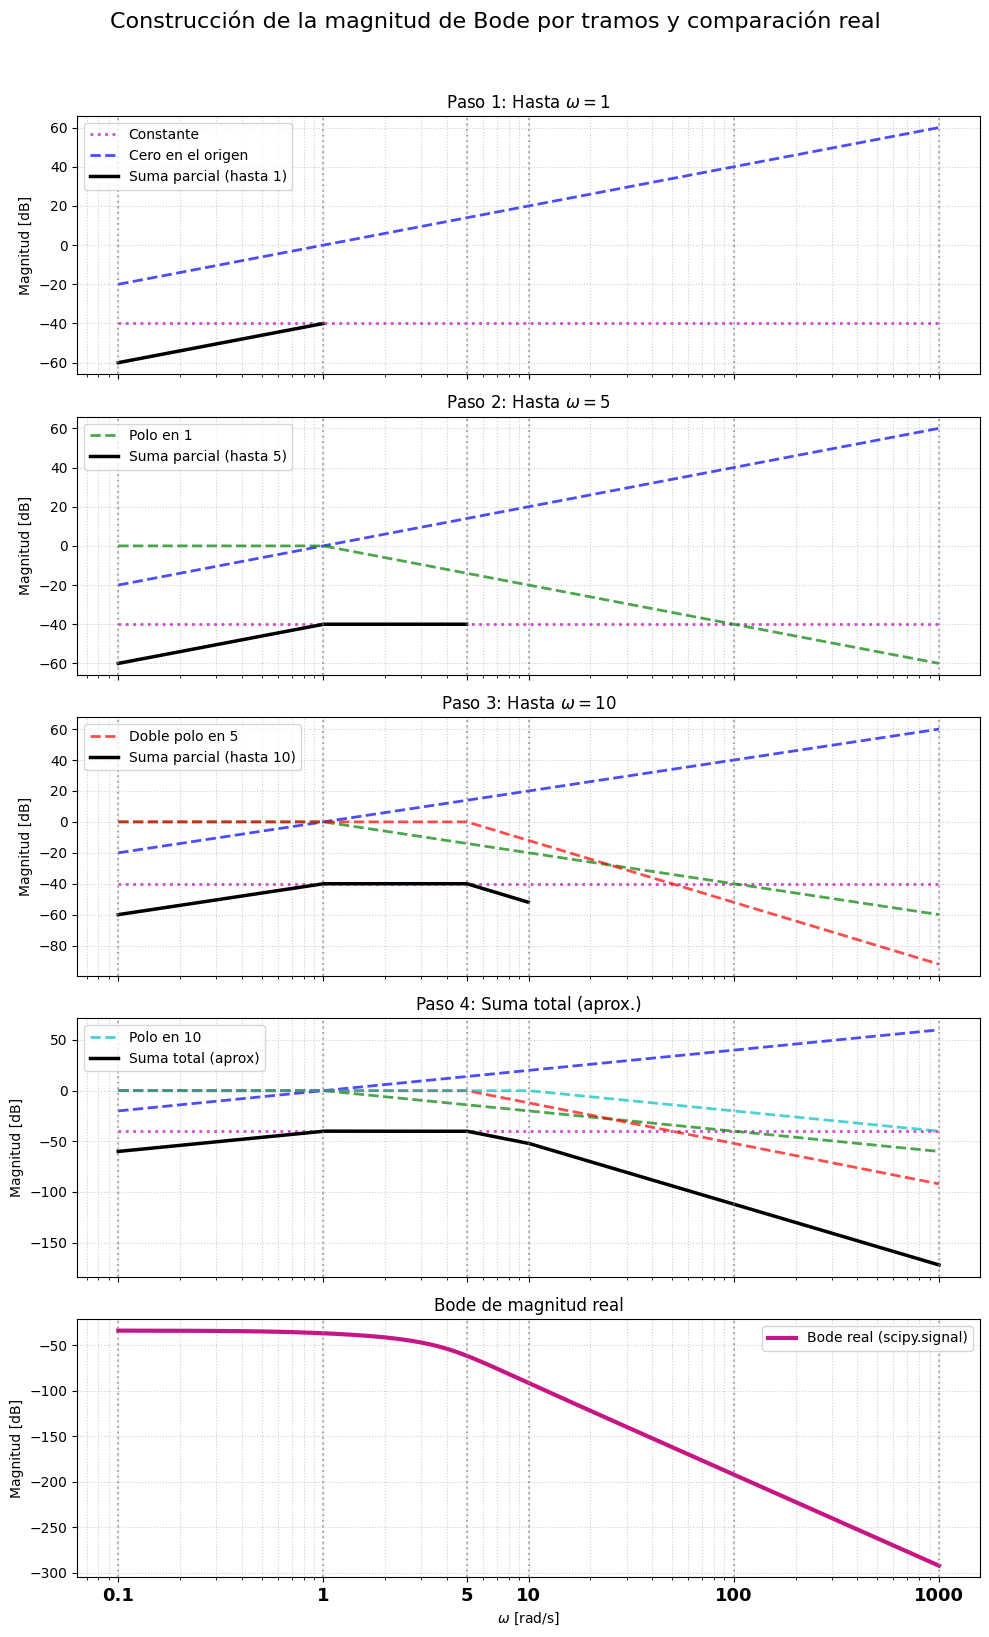

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

w = np.logspace(-1, 3, 1000)  # 0.1 a 1000 rad/s

# FACTORES DE LA TRANSFERENCIA
constante = 20 * np.log10(0.01) * np.ones_like(w)
cero_origen = 20 * np.log10(w)
polo_1 = np.zeros_like(w)
polo_1[w > 1] = -20 * np.log10(w[w > 1]/1)
doble_polo_5 = np.zeros_like(w)
doble_polo_5[w > 5] = -40 * np.log10(w[w > 5]/5)
polo_10 = np.zeros_like(w)
polo_10[w > 10] = -20 * np.log10(w[w > 10]/10)

# Sumas parciales para mostrar hasta cada quiebre
bode_paso1 = constante + cero_origen
bode_paso2 = bode_paso1 + polo_1
bode_paso3 = bode_paso2 + doble_polo_5
bode_paso4 = bode_paso3 + polo_10

# Tramos de suma negra: sólo hasta el siguiente quiebre
def tramo(y, hasta):
    y2 = np.full_like(w, np.nan)
    y2[w <= hasta] = y[w <= hasta]
    return y2

# Transferencia real para comparar
num = [0, 5]
den = np.polymul([1, 1], [1, 5, 25])  # (s+1)*(s+5)^2
den = np.polymul(den, [1, 10])        # *(s+10)
den = np.concatenate(([2], den))      # 2*(...)
system = signal.TransferFunction(num, den)
w_real, mag_real, _ = signal.bode(system, w=w)

# Frecuencias importantes para los ticks
marcas = [0.1, 1, 5, 10, 100, 1000]
marcas_labels = [str(m) for m in marcas]

fig, axs = plt.subplots(5, 1, figsize=(10, 16), sharex=True)
plt.subplots_adjust(hspace=0.25)

def annotate_x(ax):
    for m in marcas:
        ax.axvline(m, color='gray', linestyle=':', alpha=0.6)
    ax.set_xscale('log')
    ax.set_xticks(marcas)
    ax.set_xticklabels(marcas_labels, fontsize=13, weight='bold')

# Paso 1: hasta w=1
axs[0].plot(w, constante, 'm:', linewidth=2, alpha=0.7, label='Constante')
axs[0].plot(w, cero_origen, 'b--', linewidth=2, alpha=0.7, label='Cero en el origen')
axs[0].plot(w, tramo(bode_paso1, 1), 'k', linewidth=2.5, label='Suma parcial (hasta 1)')
axs[0].set_ylabel('Magnitud [dB]')
axs[0].set_title('Paso 1: Hasta $\\omega=1$')
axs[0].legend()
axs[0].grid(which='both', linestyle=':', alpha=0.6)
annotate_x(axs[0])

# Paso 2: hasta w=5
axs[1].plot(w, constante, 'm:', linewidth=2, alpha=0.7)
axs[1].plot(w, cero_origen, 'b--', linewidth=2, alpha=0.7)
axs[1].plot(w, polo_1, 'g--', linewidth=2, alpha=0.7, label='Polo en 1')
axs[1].plot(w, tramo(bode_paso2, 5), 'k', linewidth=2.5, label='Suma parcial (hasta 5)')
axs[1].set_ylabel('Magnitud [dB]')
axs[1].set_title('Paso 2: Hasta $\\omega=5$')
axs[1].legend()
axs[1].grid(which='both', linestyle=':', alpha=0.6)
annotate_x(axs[1])

# Paso 3: hasta w=10
axs[2].plot(w, constante, 'm:', linewidth=2, alpha=0.7)
axs[2].plot(w, cero_origen, 'b--', linewidth=2, alpha=0.7)
axs[2].plot(w, polo_1, 'g--', linewidth=2, alpha=0.7)
axs[2].plot(w, doble_polo_5, 'r--', linewidth=2, alpha=0.7, label='Doble polo en 5')
axs[2].plot(w, tramo(bode_paso3, 10), 'k', linewidth=2.5, label='Suma parcial (hasta 10)')
axs[2].set_ylabel('Magnitud [dB]')
axs[2].set_title('Paso 3: Hasta $\\omega=10$')
axs[2].legend()
axs[2].grid(which='both', linestyle=':', alpha=0.6)
annotate_x(axs[2])

# Paso 4: suma total en todo el rango
axs[3].plot(w, constante, 'm:', linewidth=2, alpha=0.7)
axs[3].plot(w, cero_origen, 'b--', linewidth=2, alpha=0.7)
axs[3].plot(w, polo_1, 'g--', linewidth=2, alpha=0.7)
axs[3].plot(w, doble_polo_5, 'r--', linewidth=2, alpha=0.7)
axs[3].plot(w, polo_10, 'c--', linewidth=2, alpha=0.7, label='Polo en 10')
axs[3].plot(w, bode_paso4, 'k', linewidth=2.5, label='Suma total (aprox)')
axs[3].set_ylabel('Magnitud [dB]')
axs[3].set_title('Paso 4: Suma total (aprox.)')
axs[3].legend()
axs[3].grid(which='both', linestyle=':', alpha=0.6)
annotate_x(axs[3])

# Paso 5: Bode real abajo de todo
axs[4].plot(w_real, mag_real, color='mediumvioletred', linewidth=3, label='Bode real (scipy.signal)')
axs[4].set_xlabel(r'$\omega$ [rad/s]')
axs[4].set_ylabel('Magnitud [dB]')
axs[4].set_title('Bode de magnitud real')
axs[4].legend()
axs[4].grid(which='both', linestyle=':', alpha=0.6)
annotate_x(axs[4])

plt.suptitle('Construcción de la magnitud de Bode por tramos y comparación real', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


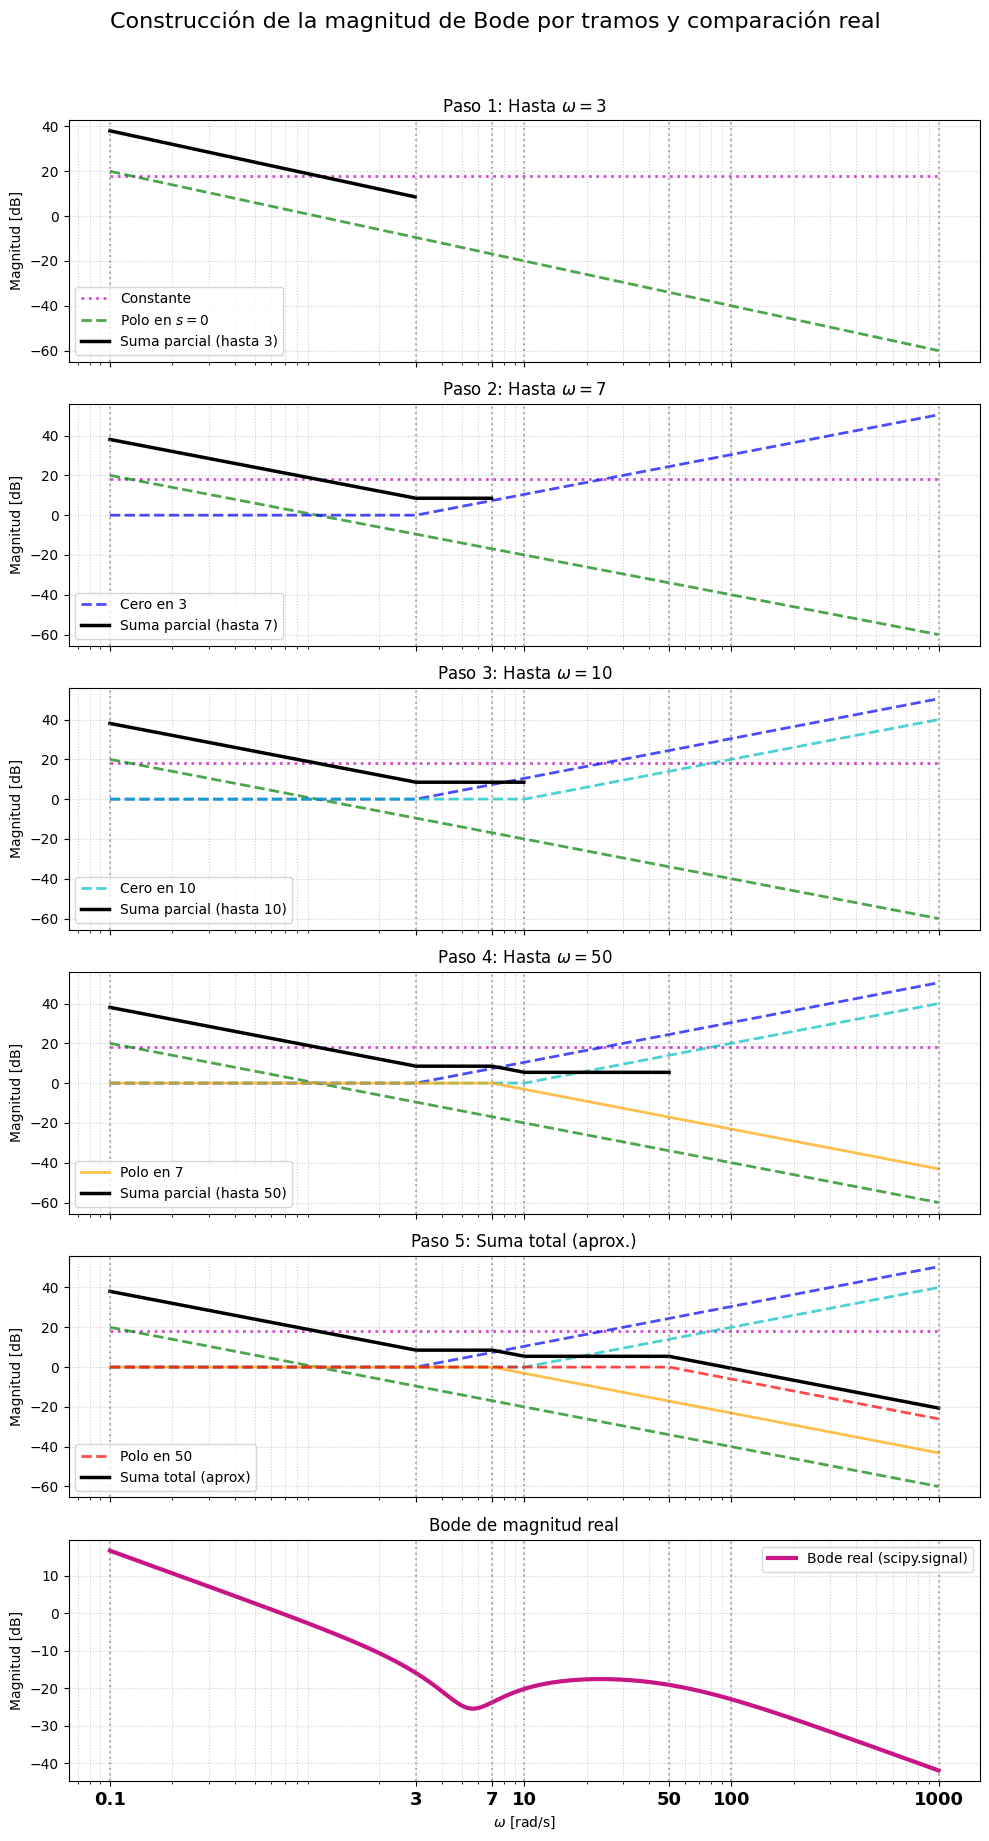

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

w = np.logspace(-1, 3, 1000)  # 0.1 a 1000 rad/s

# --- APORTES EN dB ---
K = 8
constante = 20 * np.log10(K) * np.ones_like(w)

# CEROS: (s + 3), (s + 10)
cero_3 = np.zeros_like(w)
cero_3[w > 3] = 20 * np.log10(w[w > 3] / 3)
cero_10 = np.zeros_like(w)
cero_10[w > 10] = 20 * np.log10(w[w > 10] / 10)

# POLOS: s (origen), (s + 7), (s + 50)
polo_0 = -20 * np.log10(w)
polo_7 = np.zeros_like(w)
polo_7[w > 7] = -20 * np.log10(w[w > 7] / 7)
polo_50 = np.zeros_like(w)
polo_50[w > 50] = -20 * np.log10(w[w > 50] / 50)

# --- SUMAS PARCIALES PARA CADA QUIEBRE ---
# Cada suma solo afecta a partir de la frecuencia de su aparición
bode_paso1 = constante + polo_0        # Solo hasta el primer cero en 3
bode_paso2 = bode_paso1 + cero_3       # Hasta el siguiente cero en 10
bode_paso3 = bode_paso2 + cero_10      # Hasta el primer polo en 7
bode_paso4 = bode_paso3 + polo_7       # Hasta el siguiente polo en 50
bode_paso5 = bode_paso4 + polo_50      # Todo el rango

# Tramo útil para mostrar solo hasta cierta frecuencia
def tramo(y, hasta):
    y2 = np.full_like(w, np.nan)
    y2[w <= hasta] = y[w <= hasta]
    return y2

# --- TRANSFERENCIA REAL ---
num = np.convolve([8, 24, 240], [1])   # 8(s^2 + 13s + 30)
den = np.convolve([1, 0], np.convolve([1, 7], [1, 50]))  # s(s+7)(s+50)
system = signal.TransferFunction(num, den)
w_real, mag_real, _ = signal.bode(system, w=w)

# --- GRÁFICOS ---
marcas = [0.1, 3, 7, 10, 50, 100, 1000]
marcas_labels = [str(m) for m in marcas]

fig, axs = plt.subplots(6, 1, figsize=(10, 18), sharex=True)
plt.subplots_adjust(hspace=0.22)

def annotate_x(ax):
    for m in marcas:
        ax.axvline(m, color='gray', linestyle=':', alpha=0.6)
    ax.set_xscale('log')
    ax.set_xticks(marcas)
    ax.set_xticklabels(marcas_labels, fontsize=13, weight='bold')

# Paso 1: K y polo en el origen
axs[0].plot(w, constante, 'm:', linewidth=2, alpha=0.7, label='Constante')
axs[0].plot(w, polo_0, 'g--', linewidth=2, alpha=0.7, label='Polo en $s=0$')
axs[0].plot(w, tramo(bode_paso1, 3), 'k', linewidth=2.5, label='Suma parcial (hasta 3)')
axs[0].set_ylabel('Magnitud [dB]')
axs[0].set_title('Paso 1: Hasta $\\omega=3$')
axs[0].legend()
axs[0].grid(which='both', linestyle=':', alpha=0.6)
annotate_x(axs[0])

# Paso 2: cero en 3
axs[1].plot(w, constante, 'm:', linewidth=2, alpha=0.7)
axs[1].plot(w, polo_0, 'g--', linewidth=2, alpha=0.7)
axs[1].plot(w, cero_3, 'b--', linewidth=2, alpha=0.7, label='Cero en 3')
axs[1].plot(w, tramo(bode_paso2, 7), 'k', linewidth=2.5, label='Suma parcial (hasta 7)')
axs[1].set_ylabel('Magnitud [dB]')
axs[1].set_title('Paso 2: Hasta $\\omega=7$')
axs[1].legend()
axs[1].grid(which='both', linestyle=':', alpha=0.6)
annotate_x(axs[1])

# Paso 3: cero en 10
axs[2].plot(w, constante, 'm:', linewidth=2, alpha=0.7)
axs[2].plot(w, polo_0, 'g--', linewidth=2, alpha=0.7)
axs[2].plot(w, cero_3, 'b--', linewidth=2, alpha=0.7)
axs[2].plot(w, cero_10, 'c--', linewidth=2, alpha=0.7, label='Cero en 10')
axs[2].plot(w, tramo(bode_paso3, 10), 'k', linewidth=2.5, label='Suma parcial (hasta 10)')
axs[2].set_ylabel('Magnitud [dB]')
axs[2].set_title('Paso 3: Hasta $\\omega=10$')
axs[2].legend()
axs[2].grid(which='both', linestyle=':', alpha=0.6)
annotate_x(axs[2])

# Paso 4: polo en 7
axs[3].plot(w, constante, 'm:', linewidth=2, alpha=0.7)
axs[3].plot(w, polo_0, 'g--', linewidth=2, alpha=0.7)
axs[3].plot(w, cero_3, 'b--', linewidth=2, alpha=0.7)
axs[3].plot(w, cero_10, 'c--', linewidth=2, alpha=0.7)
axs[3].plot(w, polo_7, 'orange', linewidth=2, alpha=0.7, label='Polo en 7')
axs[3].plot(w, tramo(bode_paso4, 50), 'k', linewidth=2.5, label='Suma parcial (hasta 50)')
axs[3].set_ylabel('Magnitud [dB]')
axs[3].set_title('Paso 4: Hasta $\\omega=50$')
axs[3].legend()
axs[3].grid(which='both', linestyle=':', alpha=0.6)
annotate_x(axs[3])

# Paso 5: polo en 50
axs[4].plot(w, constante, 'm:', linewidth=2, alpha=0.7)
axs[4].plot(w, polo_0, 'g--', linewidth=2, alpha=0.7)
axs[4].plot(w, cero_3, 'b--', linewidth=2, alpha=0.7)
axs[4].plot(w, cero_10, 'c--', linewidth=2, alpha=0.7)
axs[4].plot(w, polo_7, 'orange', linewidth=2, alpha=0.7)
axs[4].plot(w, polo_50, 'r--', linewidth=2, alpha=0.7, label='Polo en 50')
axs[4].plot(w, bode_paso5, 'k', linewidth=2.5, label='Suma total (aprox)')
axs[4].set_ylabel('Magnitud [dB]')
axs[4].set_title('Paso 5: Suma total (aprox.)')
axs[4].legend()
axs[4].grid(which='both', linestyle=':', alpha=0.6)
annotate_x(axs[4])

# Paso 6: Bode real abajo de todo
axs[5].plot(w_real, mag_real, color='mediumvioletred', linewidth=3, label='Bode real (scipy.signal)')
axs[5].set_xlabel(r'$\omega$ [rad/s]')
axs[5].set_ylabel('Magnitud [dB]')
axs[5].set_title('Bode de magnitud real')
axs[5].legend()
axs[5].grid(which='both', linestyle=':', alpha=0.6)
annotate_x(axs[5])

plt.suptitle('Construcción de la magnitud de Bode por tramos y comparación real', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


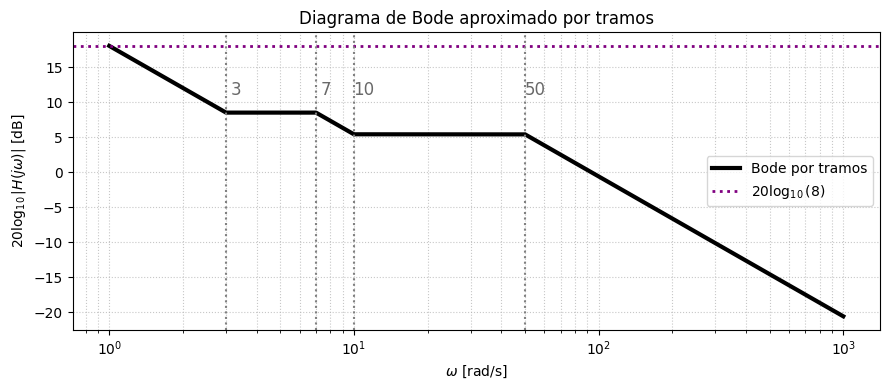

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the transfer function parameters
numerator = [8, 104, 240]
denominator = [1, 22, 105]

# Create the transfer function
system = signal.TransferFunction(numerator, denominator)

# Generate the frequency range (log scale from 0.1 to 1000 rad/s)
w = np.logspace(-1, 3, 1000)

# Compute the frequency response (magnitude and phase)
w, mag, phase = signal.bode(system, w=w)

# Plot magnitude and phase
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Magnitude plot (in dB)
ax1.semilogx(w, mag)
ax1.set_title('Bode Plot')
ax1.set_ylabel('Magnitude (dB)')
ax1.grid(True, which='both')

# Phase plot (in degrees)
ax2.semilogx(w, phase)
ax2.set_xlabel('Frequency (rad/s)')

ax2.set_ylabel('Phase (degrees)')
ax2.grid(True, which='both')

plt.tight_layout()
plt.show()
